/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

                                               text  cluster
0         Neural networks for image classification.        2
1        Convolutional networks in computer vision.        2
2              Reinforcement learning for robotics.        2
3  Clustering algorithms for customer segmentation.        0
4                    K-means and DBSCAN comparison.        0
5               Time series forecasting with LSTMs.        2
6     Transformers for natural language processing.        2
7                         Topic modeling using LDA.        0
8             Anomaly detection in network traffic.        2
9        Graph neural networks for social networks.        1
Silhouette score on embeddings: 0.005


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


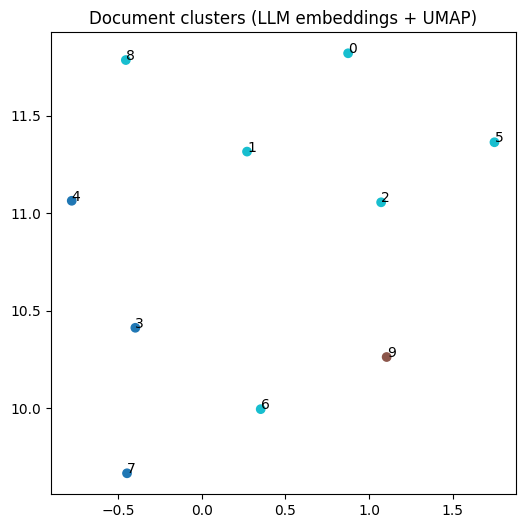

In [1]:
# ==== Cell 1: Install ====
!pip install sentence-transformers umap-learn hdbscan scikit-learn

# ==== Cell 2: Imports ====
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# ==== Cell 3: Example corpus (replace with your documents) ====
documents = [
    "Neural networks for image classification.",
    "Convolutional networks in computer vision.",
    "Reinforcement learning for robotics.",
    "Clustering algorithms for customer segmentation.",
    "K-means and DBSCAN comparison.",
    "Time series forecasting with LSTMs.",
    "Transformers for natural language processing.",
    "Topic modeling using LDA.",
    "Anomaly detection in network traffic.",
    "Graph neural networks for social networks.",
]

df = pd.DataFrame({"text": documents})
df.head()

# ==== Cell 4: Get LLM embeddings ====
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df["text"].tolist(), show_progress_bar=True)

# ==== Cell 5: KMeans clustering on embeddings ====
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(embeddings)

df["cluster"] = labels
print(df)

sil = silhouette_score(embeddings, labels)
print(f"Silhouette score on embeddings: {sil:.3f}")

# ==== Cell 6: 2D visualization with UMAP ====
import umap

reducer = umap.UMAP(random_state=42)
emb_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(6, 6))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=labels, cmap="tab10")
for i, txt in enumerate(range(len(documents))):
    plt.annotate(txt, (emb_2d[i, 0], emb_2d[i, 1]))
plt.title("Document clusters (LLM embeddings + UMAP)")
plt.show()
